In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import models, layers
from keras.src.callbacks.history import History
import shap

%matplotlib inline

# Получаем и исследуем датасет

In [ ]:
df = pd.read_csv('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv')

Набор данных содержит изображения 26 букв английского алфавита (A-Z), каждая буква на изображении расположена по центру рамки размером $28 \times 28$ пикселей.

Метка класса расположена в столбце `0`. Значения пикселей развернуты в одномерный массив и расположены в столбцах `0.1`-`0.648`. Да, в `0.1`-`0.648` на самом деле не 648, а 784 столбца, спасибо аномалиям в названии.

In [ ]:
df.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [ ]:
# Разделим метки и фичи
labels, features = df.iloc[:,0], df.iloc[:,1:]

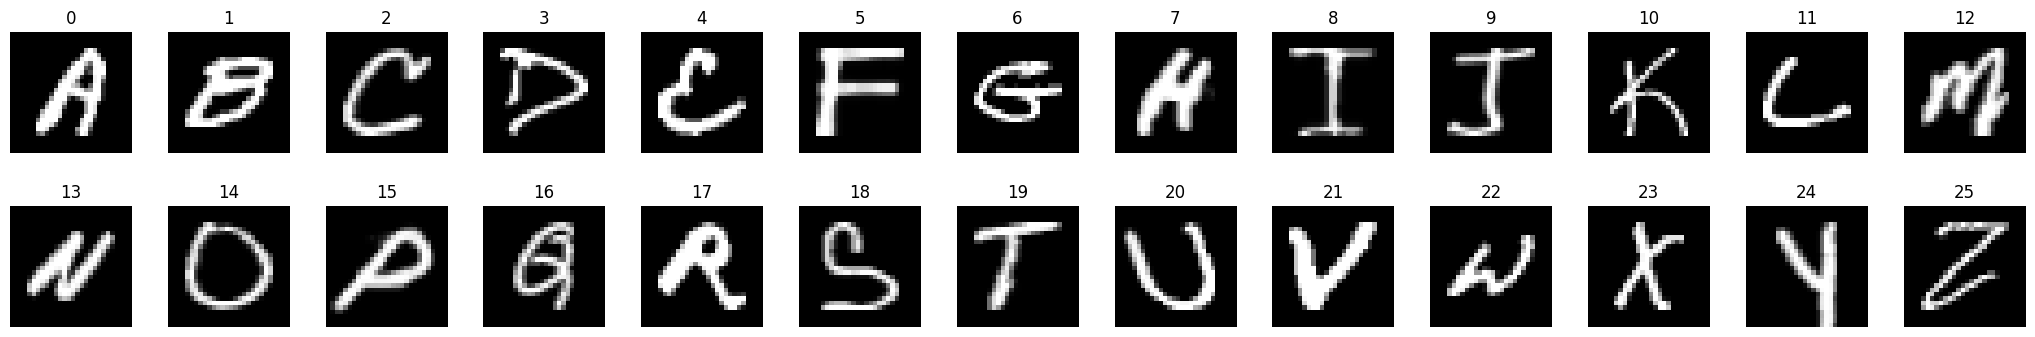

In [ ]:
# Выведем пример каждой буквы
fig,axs = plt.subplots(2,13,figsize=(26, 4))
i = -1
for row in range(2):
    for col in range(13):
        i+=1
        i_features = features[labels == i]
        img = i_features.values[0].reshape((28,28))
        axs[row,col].imshow(img,cmap='gray')
        axs[row, col].axis('off')  # Отключаем оси
        axs[row, col].set_title(f'{i}')  # Добавляем заголовок с значением i
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Настройка отступов между подграфиками
plt.show()

# Разделение и предобработка данных

In [ ]:
def prepare(X:pd.DataFrame,y:pd.Series):
    #Работа с фичами
    X = X.to_numpy()
    X = X/255
    #Работа с лейблами
    y = y.to_numpy()
    y = to_categorical(y,26)
    return X,y

In [ ]:
# Разделение тест-трейн (сбалансированное по классам)
X_train, X_test, y_train, y_test = train_test_split(features,labels,stratify=labels)
# Предобработка
X_train, y_train = prepare(X_train, y_train)
X_test, y_test = prepare(X_test, y_test)

# Первая модель

In [ ]:
#Задание модели
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

# Компиляция
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8742 - loss: 0.4628 - val_accuracy: 0.9651 - val_loss: 0.1255
Epoch 2/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9703 - loss: 0.1081 - val_accuracy: 0.9732 - val_loss: 0.0967
Epoch 3/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9795 - loss: 0.0742 - val_accuracy: 0.9773 - val_loss: 0.0858
Epoch 4/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9845 - loss: 0.0549 - val_accuracy: 0.9807 - val_loss: 0.0727
Epoch 5/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9873 - loss: 0.0432 - val_accuracy: 0.9813 - val_loss: 0.0696


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Точность на тестовом образцу:', test_acc)
print('Потери на тестовом образце:', test_loss)

2910/2910 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9813 - loss: 0.0694
Точность на тестовом образцу: 0.9812593460083008
Потери на тестовом образце: 0.06964950263500214


In [ ]:
# Занесение данных в историю
# Создадим инструмент для этого
class ExperimentsHistory:
    def __init__(self):
        self.df_experiments = None
        self.experiment_number = 0

    def add_experiment(self,model,history: History):
        this_experiment = history.history
        self.experiment_number += 1
        this_experiment['experiment_number'] = self.experiment_number
        this_experiment['epoch_number'] = range(1,len(this_experiment['accuracy'])+1)
        this_experiment['layers'] = self.get_layers_info(model.layers)
        this_experiment['optimizer'] = model.optimizer.name
        this_experiment['last_epoch'] = max(this_experiment['epoch_number'])
        df_this_experiment = (
            pd
            .json_normalize(this_experiment)
            .explode(['accuracy','loss','val_accuracy','val_loss','epoch_number'])
        )
        if self.df_experiments is None:
            self.df_experiments = df_this_experiment.reset_index(drop=True)
        else:
            self.df_experiments = pd.concat([self.df_experiments,df_this_experiment],ignore_index=True)
        return self

    def get_layers_info(self,layers):
        layers_info = []
        for layer in layers:
            layers_info.append({
                'name': layer.name
                ,'neurons': layer.units
                ,'activations': layer.activation.__name__
            })
        return layers_info

    def get_experiment(self,i):
        return self.df_experiments[self.df_experiments['experiment_number']==i]



ex = ExperimentsHistory()

# Занесение данных в историю
ex.add_experiment(model,history)


Сделаем визуализацию процесса обучения

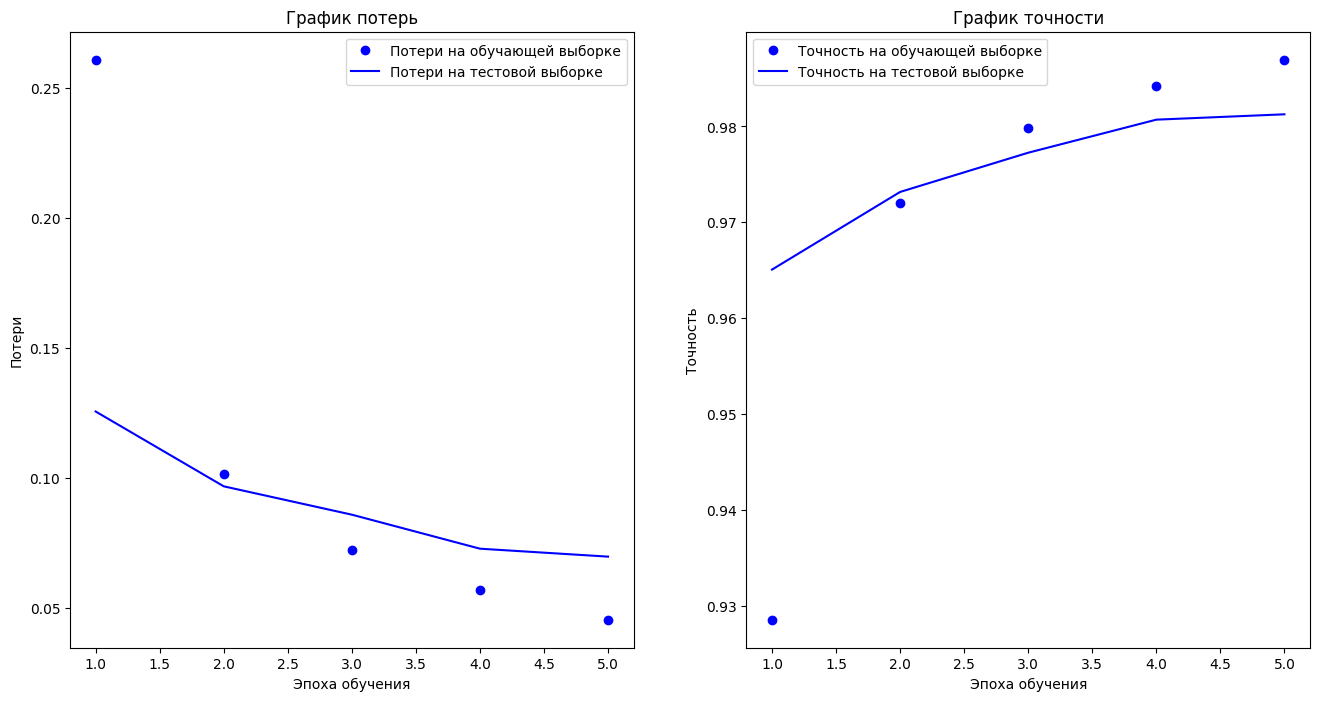

In [ ]:
def fit_visualize(history,result_for_compare=None):
    history_dict = history.history
    #
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    #
    epochs = range(1, len(loss_values) + 1)
    #
    fig,axs = plt.subplots(1,2,figsize=(16, 8))
    #
    axs[0].plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
    axs[0].plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
    axs[0].set_title('График потерь')
    axs[0].set_xlabel('Эпоха обучения')
    axs[0].set_ylabel('Потери')
    axs[0].legend()
    #
    axs[1].plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
    axs[1].plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
    axs[1].set_title('График точности')
    axs[1].set_xlabel('Эпоха обучения')
    axs[1].set_ylabel('Точность')
    axs[1].legend()
    #
    if result_for_compare:
        loss_values = result_for_compare['loss']
        val_loss_values = result_for_compare['val_loss']
        acc_values = result_for_compare['accuracy']
        val_acc_values = result_for_compare['val_accuracy']
        epochs = range(1, len(loss_values) + 1)
        axs[0].plot(epochs, loss_values, 'ro')
        axs[0].plot(epochs, val_loss_values, 'r')
        axs[1].plot(epochs, acc_values, 'ro')
        axs[1].plot(epochs, val_acc_values, 'r')
    #
    plt.subplots_adjust(hspace=0.5)  # Настройка отступов между подграфиками
    plt.show()

fit_visualize(history)

В картине обучения аномалий нет: точность растет, потери снижаются. Причем, рубеж переобучения не пройден, т.к. графики по тестовой выборке не стали откатываться назад.

# Проверка значимости фичей
Модель сразу получилась хорошо ~~как Буханка~~. Более 97% точности. Это подозрительно.

Проверим значимость фичей, чтоб проверить не пропустили ли мы в модель мета данные. Проверять будем с помощью библиотеки shap.


In [ ]:
X_for_shap = [image.reshape(28,28,1) for image in X_test[:4]]
X_for_shap = np.array(X_for_shap)
X_for_shap.shape

(4, 28, 28, 1)

In [ ]:
def f(x):
    flat_x = x.reshape(-1,28*28)
    return model.predict(flat_x)

masker = shap.maskers.Image("inpaint_telea", (28,28,1))
explainer = shap.Explainer(f, masker, output_names=np.arange(26))
shap_values = explainer(X_for_shap, max_evals=500, batch_size=50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━

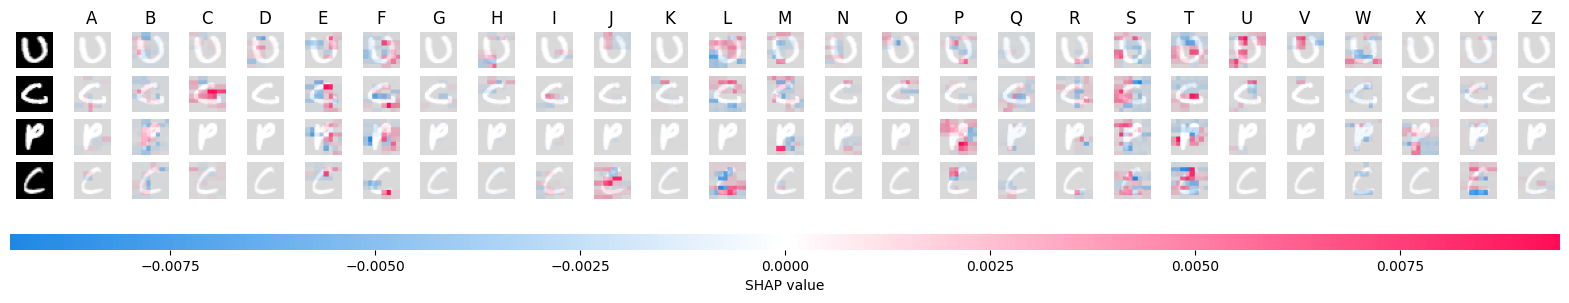

In [ ]:
labels=[l for l in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"]
shap.image_plot(shap_values,labels=labels)

Значимые пиксели расположены +- равномерно, а значит мета-информация не должна была проникнуть внутрь. Видимо, высокая точность обусловлена простотой датасета.

# Эксперименты с архитектурой

## Оптимизатор
Проверим как справляется с работой adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8727 - loss: 0.4765 - val_accuracy: 0.9614 - val_loss: 0.1375
Epoch 2/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9695 - loss: 0.1099 - val_accuracy: 0.9695 - val_loss: 0.1079
Epoch 3/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9790 - loss: 0.0751 - val_accuracy: 0.9750 - val_loss: 0.0901
Epoch 4/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9838 - loss: 0.0572 - val_accuracy: 0.9773 - val_loss: 0.0834
Epoch 5/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9875 - loss: 0.0443 - val_accuracy: 0.9806 - val_loss: 0.0748


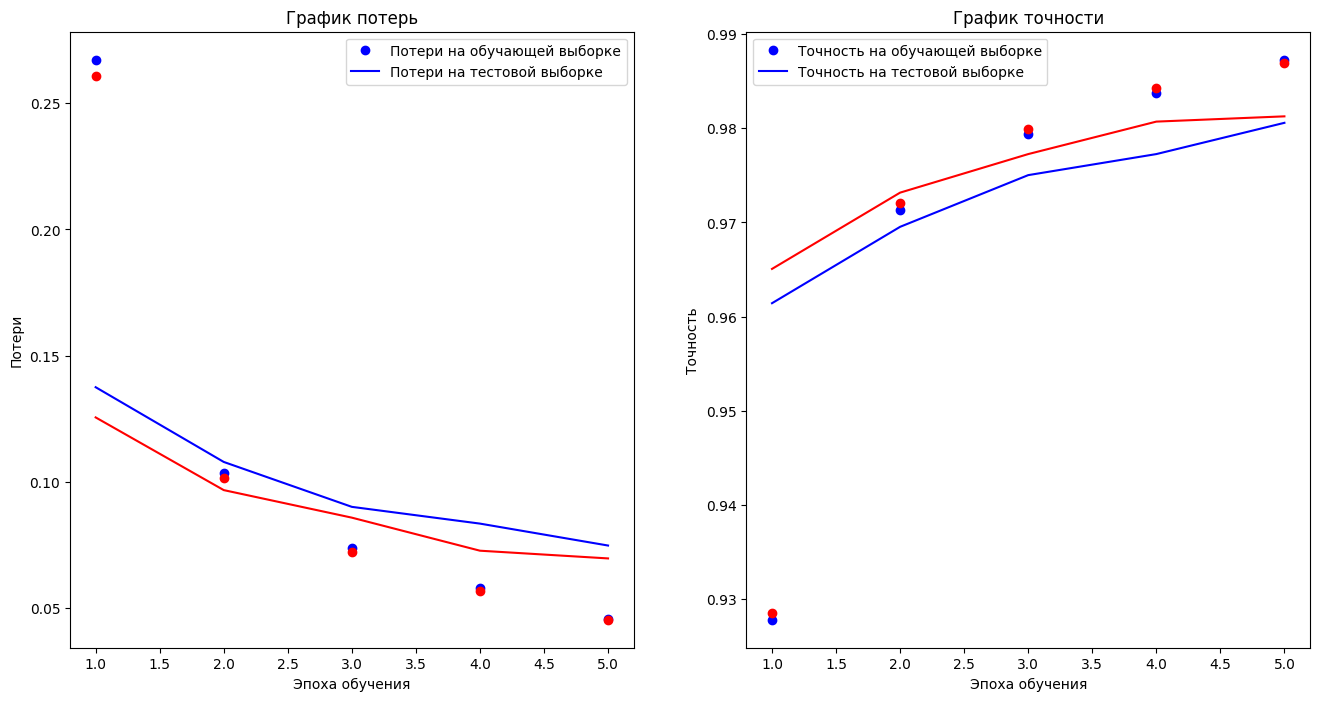

In [ ]:
#Задание модели
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

# Компиляция
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Визуализация и сравнение с первой моделью
fit_visualize(history,ex.get_experiment(1).to_dict('list'))

# Занесение данных в историю
ex.add_experiment(model,history)

На обучающих данных, Адам показывает лучшие результаты по сравнению с оригинальной моделью (красный цвет). Но на тестовых результаты почти не отличимы.

Смысла переходить на него не вижу.

## Эксперименты с архитектурой

### Простейшая модель
Для любопытства посмотрим какие данные сможет извлечь простейшая модель с 1 скрытым параметром.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1892 - loss: 2.8803 - val_accuracy: 0.2224 - val_loss: 2.4808
Epoch 2/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2284 - loss: 2.4511 - val_accuracy: 0.2382 - val_loss: 2.3944
Epoch 3/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.2459 - loss: 2.3856 - val_accuracy: 0.2570 - val_loss: 2.3589
Epoch 4/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2738 - loss: 2.3469 - val_accuracy: 0.2967 - val_loss: 2.3241
Epoch 5/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3046 - loss: 2.3164 - val_accuracy: 0.3135 - val_loss: 2.3026


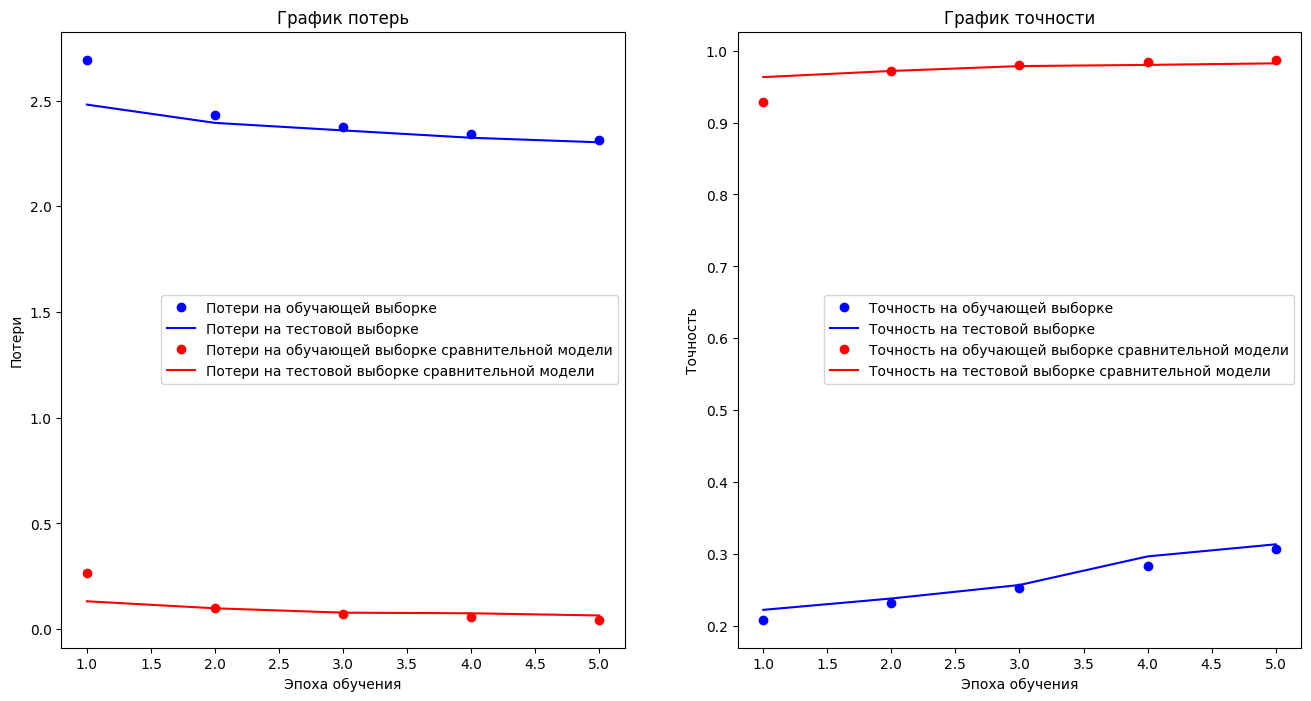

In [ ]:
#Задание модели
model = models.Sequential()
model.add(layers.Dense(1, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

# Компиляция
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Визуализация и сравнение с первой моделью
fit_visualize(history,ex.get_experiment(1).to_dict('list'))

# Занесение данных в историю
ex.add_experiment(model,history)

Чуда не случилось, максимум  что можно выжать --- 30 процентов точности. Ну, по крайней мере, задачу нельзя свести к линейному случаю.

### Чуть меннее простейшая модель: С скрытыми параметрами по числу классов
Эта проверка не несет практической ценности, просто ради красоты.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7228 - loss: 1.0515 - val_accuracy: 0.8805 - val_loss: 0.4475
Epoch 2/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8878 - loss: 0.4191 - val_accuracy: 0.8994 - val_loss: 0.3729
Epoch 3/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9059 - loss: 0.3525 - val_accuracy: 0.9096 - val_loss: 0.3362
Epoch 4/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9157 - loss: 0.3169 - val_accuracy: 0.9177 - val_loss: 0.3084
Epoch 5/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9235 - loss: 0.2886 - val_accuracy: 0.9240 - val_loss: 0.2857


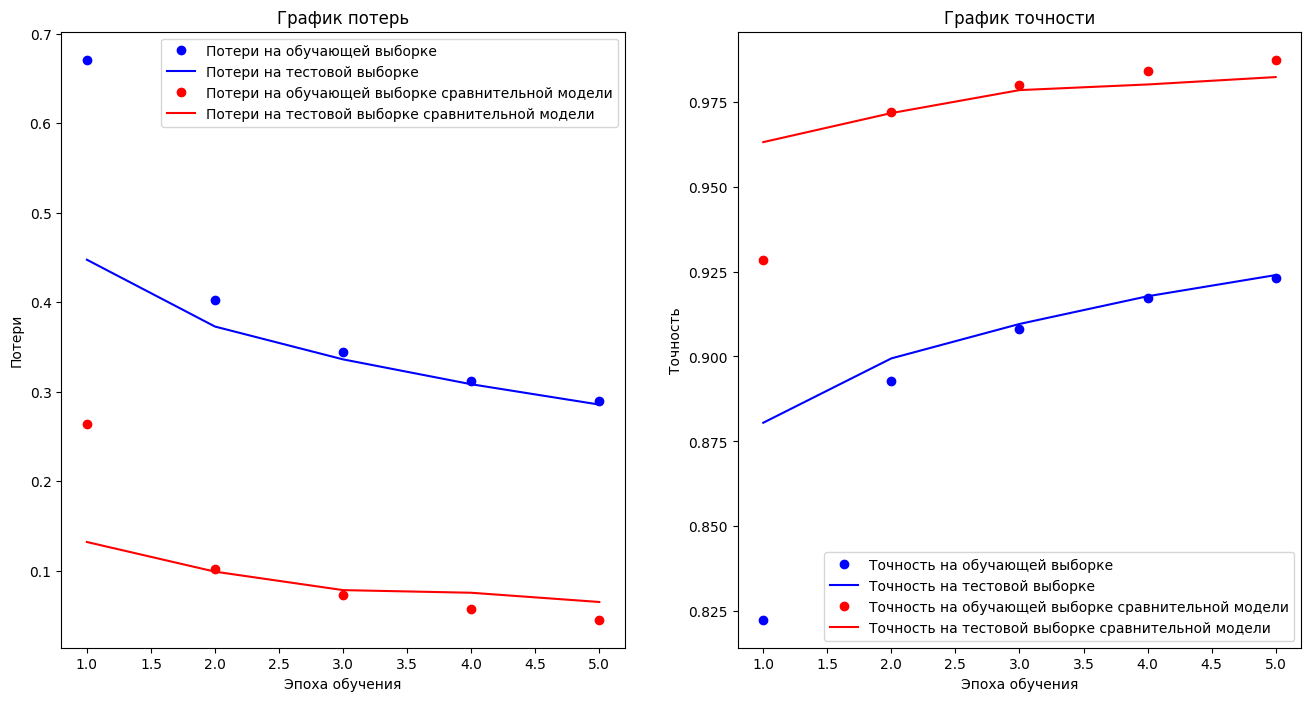

In [ ]:
#Задание модели
model = models.Sequential()
model.add(layers.Dense(26, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

# Компиляция
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Визуализация и сравнение с первой моделью
fit_visualize(history,ex.get_experiment(1).to_dict('list'))

# Занесение данных в историю
ex.add_experiment(model,history)

### Исходная с 25 эпохами
Теперь попытаемся сделать модель избыточной, дойти до грани переобучения.

Сперва попробуем увеличить число эпох у базовой модели до 25

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.8701 - loss: 0.4778 - val_accuracy: 0.9647 - val_loss: 0.1260
Epoch 2/25
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9699 - loss: 0.1087 - val_accuracy: 0.9750 - val_loss: 0.0902
Epoch 3/25
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9795 - loss: 0.0742 - val_accuracy: 0.9774 - val_loss: 0.0808
Epoch 4/25
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.9846 - loss: 0.0560 - val_accuracy: 0.9765 - val_loss: 0.0858
Epoch 5/25
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9874 - loss: 0.0451 - val_accuracy: 0.9807 - val_loss: 0.0714
Epoch 6/25
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9901 - loss: 0.0358 - val_accuracy: 0.9819 - val_loss: 0.0686
Epoch 7/25
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9915 - loss: 0.0295 - val_accuracy: 0.9864 - val_loss: 0.0545
Epoch 8/25
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.9929 -

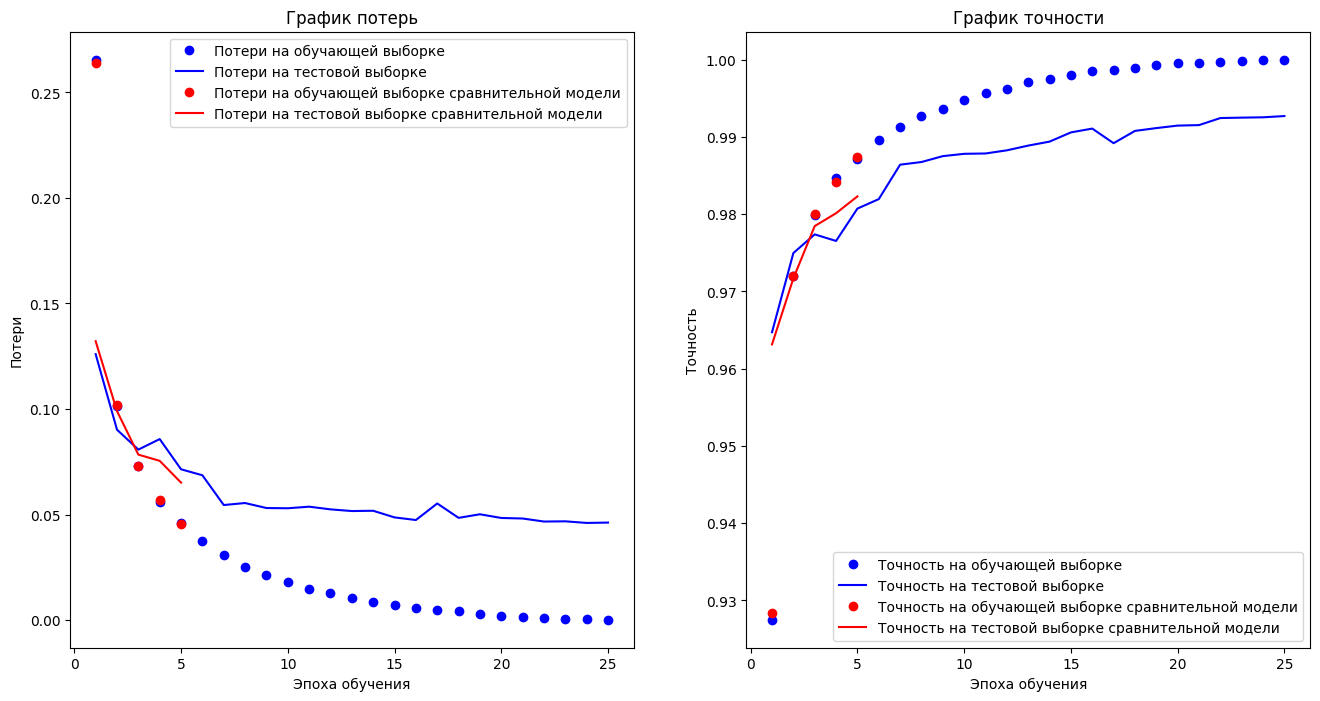

In [ ]:
#Задание модели
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

# Компиляция
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=128)

# Визуализация и сравнение с первой моделью
fit_visualize(history,ex.get_experiment(1).to_dict('list'))

# Занесение данных в историю
ex.add_experiment(model,history)

### Исходная модель с увеличением числа нейронов
Теперь, не меняя эпоху и число слоев, увеличим число нейронов.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 170s 77ms/step - accuracy: 0.8957 - loss: 0.3742 - val_accuracy: 0.9718 - val_loss: 0.0976
Epoch 2/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 209s 80ms/step - accuracy: 0.9774 - loss: 0.0771 - val_accuracy: 0.9797 - val_loss: 0.0714
Epoch 3/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 196s 78ms/step - accuracy: 0.9861 - loss: 0.0475 - val_accuracy: 0.9824 - val_loss: 0.0610
Epoch 4/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 170s 78ms/step - accuracy: 0.9912 - loss: 0.0310 - val_accuracy: 0.9783 - val_loss: 0.0767
Epoch 5/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 204s 78ms/step - accuracy: 0.9934 - loss: 0.0221 - val_accuracy: 0.9882 - val_loss: 0.0437


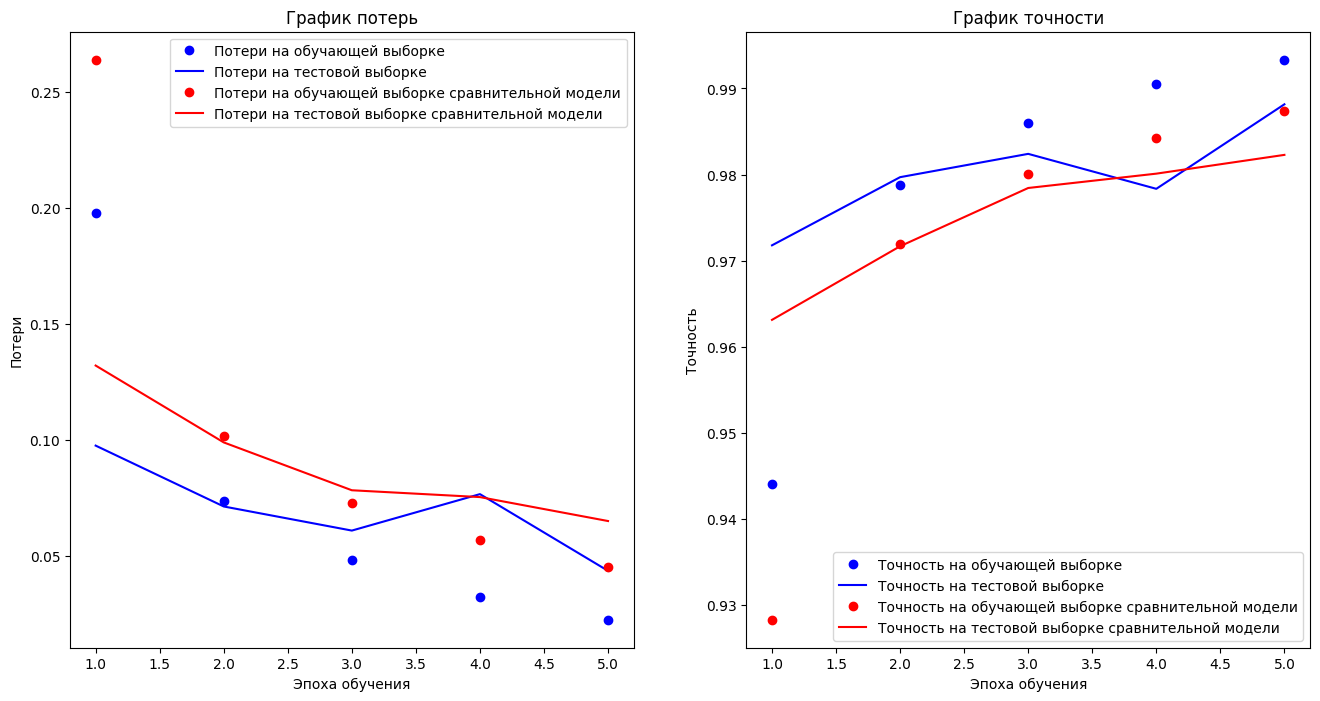

In [ ]:
#Задание модели
model = models.Sequential()
model.add(layers.Dense(4056, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

# Компиляция
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Визуализация и сравнение с первой моделью
fit_visualize(history,ex.get_experiment(1).to_dict('list'))

# Занесение данных в историю
ex.add_experiment(model,history)

### Исходная модель с увеличением числа слоев
А теперь увеличив число слоев оставив остальное неизменным.



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 74s 34ms/step - accuracy: 0.8589 - loss: 0.4917 - val_accuracy: 0.9693 - val_loss: 0.1064
Epoch 2/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9717 - loss: 0.0977 - val_accuracy: 0.9710 - val_loss: 0.1003
Epoch 3/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9808 - loss: 0.0669 - val_accuracy: 0.9813 - val_loss: 0.0676
Epoch 4/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9857 - loss: 0.0504 - val_accuracy: 0.9808 - val_loss: 0.0752
Epoch 5/5
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 71s 32ms/step - accuracy: 0.9878 - loss: 0.0436 - val_accuracy: 0.9838 - val_loss: 0.0659


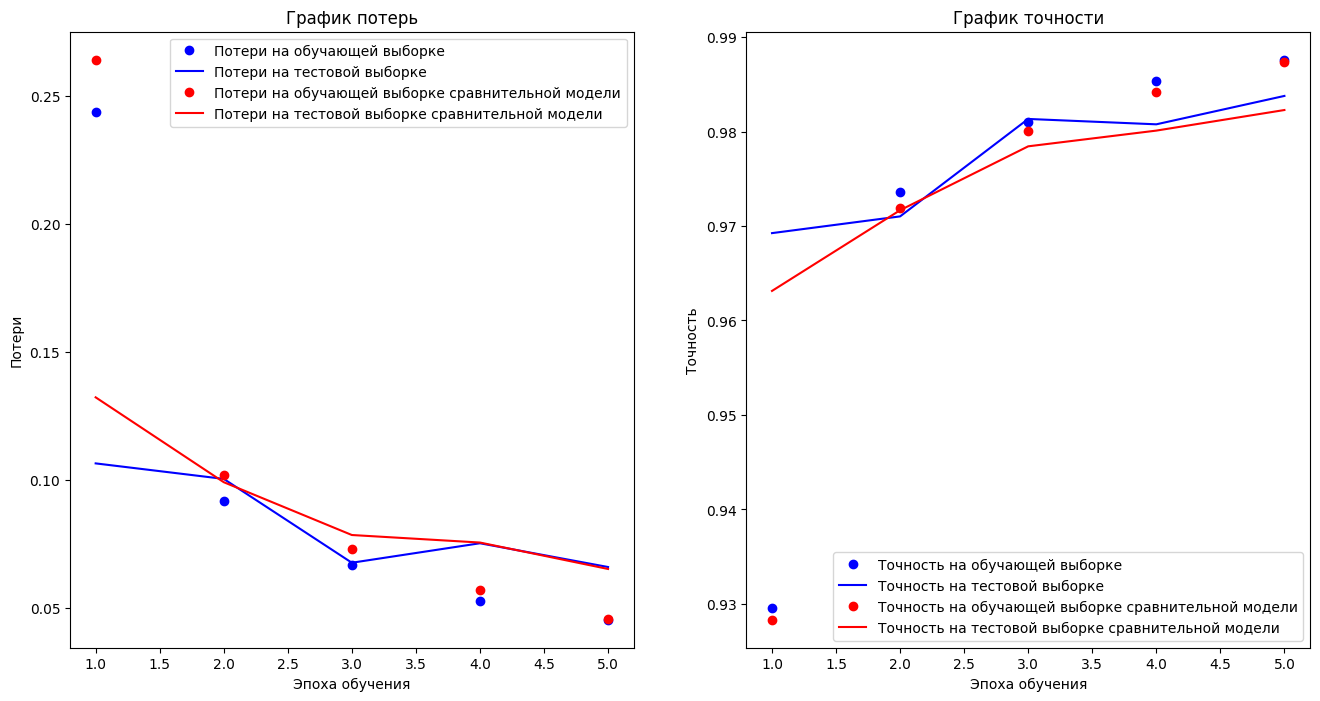

In [ ]:
#Задание модели
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

# Компиляция
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

# Визуализация и сравнение с первой моделью
fit_visualize(history,ex.get_experiment(1).to_dict('list'))

# Занесение данных в историю
ex.add_experiment(model,history)

# Таблица с экспериментами


In [ ]:
ex.df_experiments

,accuracy,loss,val_accuracy,val_loss,experiment_number,epoch_number,layers,optimizer,last_epoch
0,0.928316,0.26401,0.963131,0.132148,1,1,"[{'name': 'dense', 'neurons': 512, 'activation...",rmsprop,5
1,0.971966,0.101972,0.97168,0.099013,1,2,"[{'name': 'dense', 'neurons': 512, 'activation...",rmsprop,5
2,0.980038,0.072977,0.978446,0.078391,1,3,"[{'name': 'dense', 'neurons': 512, 'activation...",rmsprop,5
3,0.984209,0.056803,0.98011,0.07545,1,4,"[{'name': 'dense', 'neurons': 512, 'activation...",rmsprop,5
4,0.987427,0.045424,0.98229,0.065127,1,5,"[{'name': 'dense', 'neurons': 512, 'activation...",rmsprop,5
5,0.928631,0.262778,0.961821,0.135848,2,1,"[{'name': 'dense_2', 'neurons': 512, 'activati...",rmsprop,5
6,0.971873,0.101377,0.975331,0.089279,2,2,"[{'name': 'dense_2', 'neurons': 512, 'activati...",rmsprop,5
7,0.979931,0.072521,0.978016,0.078953,2,3,"[{'name': 'dense_2', 'neurons': 512, 'activati...",rmsprop,5
8,0.984256,0.056071,0.980164,0.071243,2,4,"[{'name': 'dense_2', 'neurons': 512, 'activati...",rmsprop,5
9,0.987399,0.044886,0.983858,0.062261,2,5,"[{'name': 'dense_2', 'neurons': 512, 'activati...",rmsprop,5


# Выбор наилучшей модели
Судя по графикам, наибольшую пользу по отношению к затраченому времени приносят увеличение эпох и увеличение нейронов в слое.
Попробуем увеличить оба этих параметра чтоб добиться еще лучшего результата на тестовых данных.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.8818 - loss: 0.4287 - val_accuracy: 0.9652 - val_loss: 0.1241
Epoch 2/50
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.9743 - loss: 0.0920 - val_accuracy: 0.9701 - val_loss: 0.1054
Epoch 3/50
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.9833 - loss: 0.0596 - val_accuracy: 0.9818 - val_loss: 0.0678
Epoch 4/50
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.9875 - loss: 0.0435 - val_accuracy: 0.9824 - val_loss: 0.0679
Epoch 5/50
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9907 - loss: 0.0324 - val_accuracy: 0.9850 - val_loss: 0.0602
Epoch 6/50
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9928 - loss: 0.0247 - val_accuracy: 0.9871 - val_loss: 0.0539
Epoch 7/50
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9946 - loss: 0.0184 - val_accuracy: 0.9852 - val_loss: 0.0593
Epoch 8/50
2183/2183 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9957 -

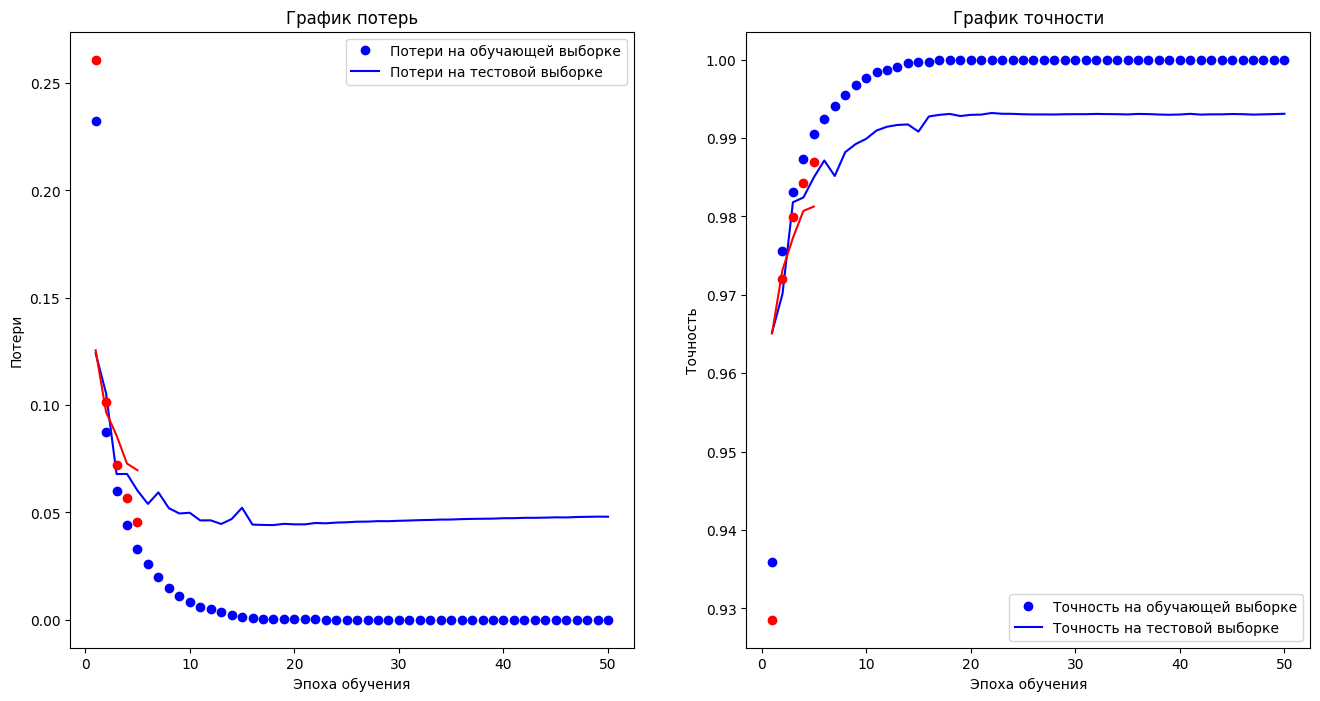

In [ ]:
#Задание модели
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

# Компиляция
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

# Визуализация и сравнение с первой моделью
fit_visualize(history,ex.get_experiment(1).to_dict('list'))

# Занесение данных в историю
ex.add_experiment(model,history)

Видно, что на 20 шаге модель вышла на плато точности: 99.3% на тестовых данных.
Видимо это предел для данной архитектруры.

Так что назначаем модель наилучшей, а её точность наибольшей.